PR_Status_3
HER2
Ki67_20%
Tsize_20 mm
TumorType_5
NHG
NodeStatus


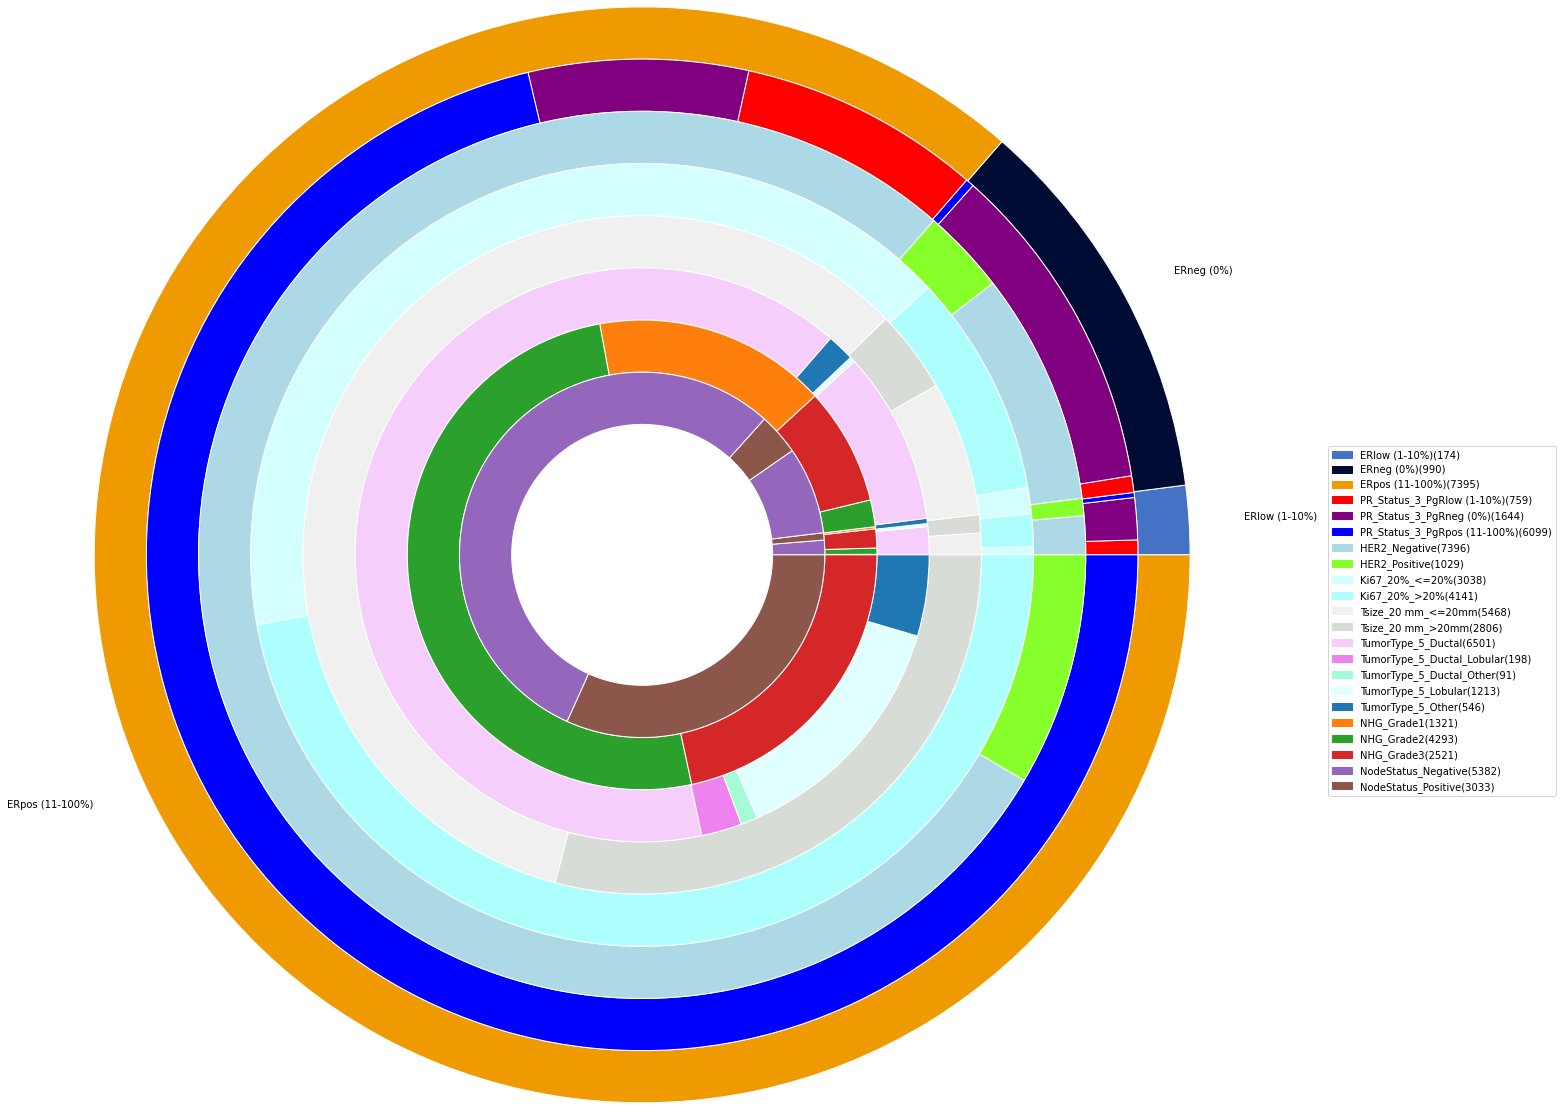

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import proplot as plot
import numpy as np
from random import randint
import matplotlib.patches as mpatches
import seaborn as sns

###################### Reading the file ##########################
scuf = pd.read_table("E:/Sunny/ERlow/ERlow_Project_Annotation.txt")
# scuf = pd.read_table("F:/Users/Sunnyveerla/Projects/SV_IH/SCAN-B/Projects/Pre-Post_Chemo/Sample_specimen_PAM50_ann.txt")

######################### Initializing the Base Ring and inner rings ##########################
baseRing = "ER_Status_3"
columns = ['PR_Status_3',"HER2",'Ki67_20%','Tsize_20 mm','TumorType_5','NHG','NodeStatus']

###################### Preparing colors ###############################################
palette = sns.color_palette("pastel")
colors_array = np.array(palette)

# Now, `colors_array` contains the colors from the Seaborn palette in a NumPy array format
palette
colors = ['#4472C4','#000C33','#ee9a00','red', 'purple', 'blue', 'lightblue', '#87FF2A', '#d4ffff', '#acfffc',
          '#F0F0F0', '#d8dcd6', '#f6cefc', "violet", '#a5fbd5', '#E0FFFF']+sns.color_palette("tab10").as_hex()+sns.color_palette("husl", 8).as_hex()

###################### Initializing the plot layout ##########################
r = 6.3
w = 0.6
fig, ax = plt.subplots()

###################### Function to get subgroup totals ##########################
def fill(main_group_name,main_factor_names,second_group_name,second_factor_names):
    subgroup = []
    for x in range(len(main_group_name)):
        for m in main_group_name:
            for mf in main_factor_names:
                for sg in second_group_name:
                    for u in second_factor_names:
                        subgroup.append(pd.DataFrame(scuf.loc[scuf[m]==mf]).loc[scuf[sg]==u].shape[0])
    return subgroup


all = []
# First Ring (outside)
baseTypes = scuf[baseRing].value_counts()
sort_subtypes = pd.DataFrame(baseTypes.sort_index())
# Make data: I have 3 groups and 7 subgroups
group_names=list(sort_subtypes.index.values)
group_size = list(sort_subtypes[baseRing])

baseTypes = scuf[baseRing].value_counts()
lbuniques = [ x + '('+str(baseTypes[x])+')' for x in group_names]
# print(group_names)
i1 = 0
l = len(group_names)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=r, labels=group_names, colors=colors[i1:l])
# donut_charts.append(mypie)
plt.setp( mypie, width=w, edgecolor='white')
all.extend(lbuniques)



wl=1
for col in columns:
    SBtypes = scuf.groupby(by=[baseRing, col], as_index=True).count()
    scodes, suniques = pd.factorize(scuf[col], sort=True)
    sbool = pd.DataFrame(scuf[col].value_counts())
    svalues = scuf[col].value_counts()
    lsuniques = [col+'_' + x + '('+str(svalues[x])+')' for x in suniques]
    print(col)
    all.extend(lsuniques) 
    
    subgroup_names=list(SBtypes.index.values)
    subgroup_size = fill([baseRing], group_names, [col], suniques)
    # print(subgroup_size)   
    i1 = l
    l = l+len(list(suniques))
    
    mypie, _ = ax.pie(subgroup_size, radius=r-(w*wl),  labeldistance=0.7, colors=colors[i1:l],normalize=True)
    # donut_charts.append(mypie)
    plt.setp(mypie, width=w, edgecolor='white')
    wl = wl+1

mpat = []
for i in range(len(all)):
    mpat.append(mpatches.Patch(color=colors[i], label=all[i]))

plt.legend(handles=mpat,bbox_to_anchor=(2.55, 1), loc=2, borderaxespad=0.)
#plt.legend(bbox_to_anchor=(2.05, 1), loc=2, borderaxespad=0.)
# show it

plt.savefig('test.pdf',bbox_inches = 'tight')
plt.show()
plt.close()
